# Simple data analysis

In [28]:
# Standard Data Science Helpers
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy
from scipy import stats
from scipy.integrate import quad
from scipy.stats import uniform
from scipy.stats import mode


In [29]:
data = pd.Series([8.51, 1.55, 10.18, 12.28, 3.55, 3.92, 15.99, 6.31, 6.68, 14.59, 
        2.28,5.70, 12.26, 11.91, 11.51, 4.03, 11.34, 3.21, 7.41,  0.23, 
        8.34, 6.37, 14.65, 4.13, 0.52, 9.75, 7.57, 10.05, 4.68,   8.88, 
        5.99, 14.68, 14.64, 16.06, 6.72, 14.40, 8.15, 9.77, 8.12, 15.45,
        14.00, 9.65, 6.50, 5.12, 14.93, 1.71, 4.78, 14.38, 11.43, 10.24])
bin_counts = 7 #specified number of half-open bins
variational_series = sorted(data)
sample_range = variational_series[-1] - variational_series[0]
print("Размах выборки: ", sample_range)
print("Вариационный ряд: ", variational_series)

Размах выборки:  15.829999999999998
Вариационный ряд:  [0.23, 0.52, 1.55, 1.71, 2.28, 3.21, 3.55, 3.92, 4.03, 4.13, 4.68, 4.78, 5.12, 5.7, 5.99, 6.31, 6.37, 6.5, 6.68, 6.72, 7.41, 7.57, 8.12, 8.15, 8.34, 8.51, 8.88, 9.65, 9.75, 9.77, 10.05, 10.18, 10.24, 11.34, 11.43, 11.51, 11.91, 12.26, 12.28, 14.0, 14.38, 14.4, 14.59, 14.64, 14.65, 14.68, 14.93, 15.45, 15.99, 16.06]


In [30]:
frequency_table = data.value_counts(bins = bin_counts).sort_index().reset_index()
frequency_table.columns = ['Разряд','Частота']
middle_bin_column = pd.Series(list(map(lambda b: (b.right + b.left)/2, frequency_table['Разряд'])))
frequency_table.insert(1,"Середина разряда", middle_bin_column)
normalized_frequency_column = pd.Series(list(map(lambda n: n/data.size, frequency_table['Частота'])))
frequency_table.insert(3,"Относительная частота", normalized_frequency_column)

In [31]:
def relative_accumulated_frequency(normalized_frequency):
    rel_accum_frequency = []
    for i in range(len(normalized_frequency)):
        sum = 0
        for j in range(i + 1):
            sum += normalized_frequency[j]
        rel_accum_frequency.append(sum)
    return  rel_accum_frequency

In [32]:
relative_accumulated_frequency_column = pd.Series(relative_accumulated_frequency(normalized_frequency_column))
frequency_table.insert(4,"Относительная накопленная частота", relative_accumulated_frequency_column)
frequency_table

,Разряд,Середина разряда,Частота,Относительная частота,Относительная накопленная частота
0,"(0.213, 2.491]",1.3520,5,0.10,0.10
1,"(2.491, 4.753]",3.6220,6,0.12,0.22
2,"(4.753, 7.014]",5.8835,9,0.18,0.40
3,"(7.014, 9.276]",8.1450,7,0.14,0.54
4,"(9.276, 11.537]",10.4065,9,0.18,0.72
5,"(11.537, 13.799]",12.6680,3,0.06,0.78
6,"(13.799, 16.06]",14.9295,11,0.22,1.00


Text(0, 0.5, 'nj / nd')

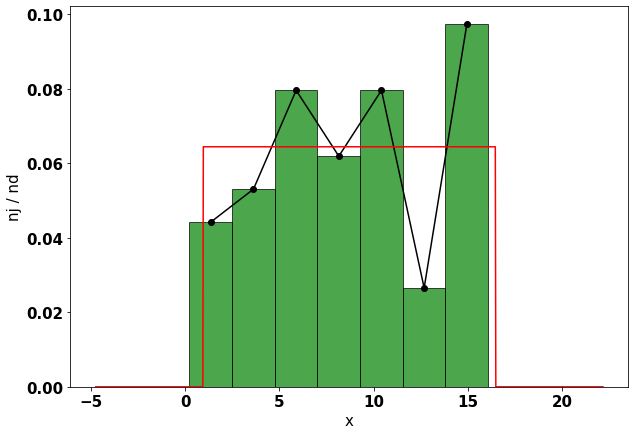

In [33]:
plt.figure(figsize=(10, 7))
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
n, x, _ = plt.hist(data, bins = 7,color='green',alpha=0.7,edgecolor='black', density = True)
bin_centers = 0.5*(x[1:]+x[:-1])
x = np.linspace(data.mean() - 3*data.std(), data.mean() + 3*data.std(), 1000)
plt.plot(bin_centers,n, color = "black", marker='o')
plt.plot(x, stats.uniform.pdf(x, loc = 0.94, scale = 16.46 - 0.94), color = "red")
plt.xlabel("x")
plt.ylabel("nj / nd")


Text(0, 0.5, 'F(x)')

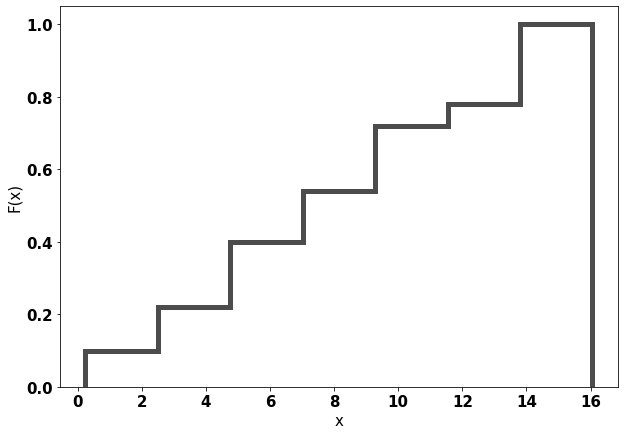

In [34]:
plt.figure(figsize=(10, 7))
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
n, x, _ = plt.hist(data, linewidth=5,bins = bin_counts,color='green',alpha=0.7,edgecolor='black', density = True, cumulative = True,histtype='step')
plt.xlabel("x")
plt.ylabel("F(x)")

In [35]:
print("Выборочные числовые характеристики негруппированной выборки")
print("Математическое ожидание: ", data.mean())
print("Смещенная дисперсия: ", data.std(ddof = 0)**2)
print("Несмещенная дисперсия: ", data.std()**2)
print("Медиана: ", data.median())
print("Мода: ", data.mode()[data.size-1])
print("Выборочные числовые характеристики группированной выборки")
tmp = list(map(lambda j: middle_bin_column[j]*frequency_table['Частота'][j],[x for x in range(bin_counts)]))
s_mean = sum(tmp)/data.size
print("Выборочное среднее: ", s_mean)
tmp = list(map(lambda j: (middle_bin_column[j]-s_mean)**2*frequency_table['Частота'][j],[x for x in range(bin_counts)]))
s_disp = sum(tmp)/data.size
print("Выборочная дисперсия: ", s_disp)
imax = frequency_table['Частота'].idxmax()
s_mode = frequency_table["Разряд"][imax].left + ((frequency_table["Частота"][imax] - frequency_table["Частота"][imax - 1])/(2*frequency_table["Частота"][imax] - frequency_table["Частота"][imax - 1] - frequency_table["Частота"][imax]))*sample_range/bin_counts
print("Выборочная мода: ", s_mode)
s_median = frequency_table["Разряд"][3].left + ((data.size/2 - sum([frequency_table["Частота"][j] for j in range(3)]))/frequency_table["Частота"][3])*sample_range/bin_counts
print("Выборочная медиана: ", s_median)

Выборочные числовые характеристики негруппированной выборки
Математическое ожидание:  8.702
Смещенная дисперсия:  19.676424
Несмещенная дисперсия:  20.077983673469387
Медиана:  8.425
Мода:  16.06
Выборочные числовые характеристики группированной выборки
Выборочное среднее:  8.686910000000001
Выборочная дисперсия:  19.970828136899996
Выборочная мода:  16.06042857142857
Выборочная медиана:  8.62930612244898


In [36]:
row_6 = frequency_table.loc[6]
frequency_table = frequency_table.drop([4,5,6])
new_row = {'Разряд':pd.Interval(left = 9.276, right = 13.799), 'Частота':12, 'Середина разряда':11.54, 'Относительная частота':0.24,"Относительная накопленная частота":0.78}
frequency_table = frequency_table.append(new_row, ignore_index=True)
frequency_table = frequency_table.append(row_6, ignore_index = True)
frequency_table

,Разряд,Середина разряда,Частота,Относительная частота,Относительная накопленная частота
0,"(0.213, 2.491]",1.3520,5,0.10,0.10
1,"(2.491, 4.753]",3.6220,6,0.12,0.22
2,"(4.753, 7.014]",5.8835,9,0.18,0.40
3,"(7.014, 9.276]",8.1450,7,0.14,0.54
4,"(9.276, 13.799]",11.5400,12,0.24,0.78
5,"(13.799, 16.06]",14.9295,11,0.22,1.00


Необходимое условие применения критерия "хи-квадрат"($n_{j}$ >= 5) выполняется. Требуется на уровне значимости a = 0.05 проверить гипотезу о том, что генеральная совокупность данной выборки распределена по равномерному распределению.

In [37]:
#Воспользуемся МП-оценкой параметров a и b
a = data.mean() - np.sqrt(3)*data.std()
b = data.mean() + np.sqrt(3)*data.std()
print("Среднее - ", data.mean())
print("Стандартное отклонение -", data.std())
print("a - ",a)
print("b - ",b)

Среднее -  8.702
Стандартное отклонение - 4.480846312190297
a -  0.9409465263787702
b -  16.46305347362123


2) Найдем вероятности $p_i$ попадания случайной величины в каждый из интервалов:

In [38]:
probability_of_bins = list(map(lambda bin: quad(lambda x: 1/(b-a), bin.left, bin.right), frequency_table["Разряд"]))
theoretical_frequencies = [data.size * x[0] for x in probability_of_bins]
print("Вероятности попадания в кажды из интервалов: ", [x[0] for x in probability_of_bins])

Вероятности попадания в кажды из интервалов:  [0.1467584270448988, 0.14572763914642717, 0.1456632149027727, 0.14572763914642714, 0.29139085404919984, 0.14566321490277265]


In [39]:
xi_j1 = []
for j in range(6):
    xi_j1.append(((frequency_table["Частота"][j] - theoretical_frequencies[j])**2) / theoretical_frequencies[j])

In [40]:
print("Хи-квадрат распределения = ", np.sum(xi_j1))

Хи-квадрат распределения =  3.7379495620787084


r = 6, k = 2 -> r - k - 1 = 3

In [41]:
stats.chi2.ppf(0.95, 3)

7.814727903251179

Требуется на уровне значимости a = 0.05 проверить гипотезу о том, что генеральная совокупность данной выборки распределена по экспоненциальному распределению.

In [42]:
l = 1/10.49
f_exp = lambda x: l*np.exp(-1*l*x)

In [43]:
probability_of_bins = list(map(lambda bin: quad(f_exp, bin.left, bin.right), frequency_table["Разряд"]))
theoretical_frequencies = [data.size * x[0] for x in probability_of_bins]
print("Вероятности попадания в кажды из интервалов: ", [x[0] for x in probability_of_bins])

Вероятности попадания в кажды из интервалов:  [0.1912746244129959, 0.15296936618709275, 0.12324910016447248, 0.09939135470338117, 0.14465992095455343, 0.05203218250316295]


In [44]:
xi_j2 = []
for j in range(6):
    xi_j2.append((frequency_table["Частота"][j] - theoretical_frequencies[j])**2 / theoretical_frequencies[j])

In [45]:
print("Хи-квадрат распределения = ", np.sum(xi_j2))

Хи-квадрат распределения =  34.92225881021647


In [46]:
stats.chi2.ppf(0.95, 4)

9.487729036781154

In [47]:
#Поскольку 41.39 > 9.48, то есть основания отвергать гпиотезу о экспоненциальном распределении

In [48]:
import math
def normpdf(x):
    sd = data.std()
    mean = data.mean()
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [49]:
probability_of_bins = list(map(lambda bin: quad(normpdf, bin.left, bin.right), frequency_table["Разряд"]))
theoretical_frequencies = [data.size * x[0] for x in probability_of_bins]
print("Вероятности попадания в кажды из интервалов: ", [x[0] for x in probability_of_bins])

Вероятности попадания в кажды из интервалов:  [0.053776020278835844, 0.1062210979155045, 0.16411696169010026, 0.19777252417983815, 0.32137167882417617, 0.07737833406927903]


In [50]:
xi_j3 = []
for j in range(6):
    xi_j3.append((frequency_table["Частота"][j] - theoretical_frequencies[j])**2 / theoretical_frequencies[j])


In [51]:
print("Хи-квадрат распределения = ", np.sum(xi_j3))

Хи-квадрат распределения =  17.170657146319957


In [52]:
#Поскольку 17.17 > 9.48, то есть основания отвергать гпиотезу о нормальном распределении

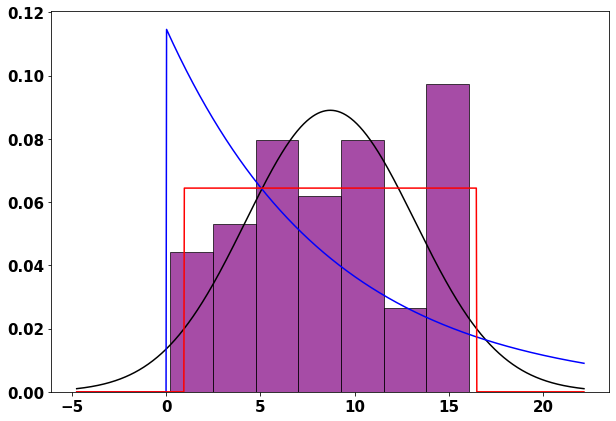

In [53]:
plt.figure(figsize=(10, 7))
font = {'weight' : 'bold',
        'size'   : 15}
x = np.linspace(data.mean() - 3*data.std(), data.mean() + 3*data.std(), 1000)
plt.plot(x, stats.norm.pdf(x, data.mean(), data.std()), color = "black")
plt.plot(x, stats.expon.pdf(x,scale = data.mean()), color = "blue")
plt.plot(x, stats.uniform.pdf(x, loc = a, scale = b - a), color = "red")
n, x, _ = plt.hist(data, bins = 7,color='purple',alpha=0.7,edgecolor='black', density = True)